# PYBER

In this analysis, we will be using pandas and matplotlib to examine Pyber's total recordset of rides.

Key Insights:
1. Urban cities have the highest number of drivers, riders, and percentage of total fares.
2. Rural cities have the lowest number of drivers and riders, but the average fare  ($34.64) is the highest. 
The average fare for suburban cities is $30.74 and the average for urban cities is $24.50.
3. Over 80% of total drivers are from urban cities. 

Notebook Setup

In [188]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt 
import pandas as pd

# Create variables to load files
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Merge the data into a single dataset
pyber_data = city_data.merge(ride_data, on = "city")

# Let's look at the first 5 rides to peak at the data
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

For each of the three city types, we will find the average fare per ride and the total number of rides.

In [8]:
#Use the loc method to filter data by city type
urban = pyber_data.loc[(pyber_data.type == "Urban")]

#Use groupby to find the average fare of a city type
urban_avg = urban.groupby("city")["fare"].mean()

#Use groupby to find the total number of rides of a city type
urban_total = urban.groupby("city")["driver_count"].count()

In [9]:
suburban = pyber_data.loc[(pyber_data["type"] == "Suburban")]
sub_avg = suburban.groupby("city")["fare"].mean()
sub_total = suburban.groupby("city")["ride_id"].count()

In [191]:
rural = pyber_data.loc[(pyber_data["type"] == "Rural")]
rural_avg = rural.groupby("city")["fare"].mean()
rural_total = rural.groupby("city")["ride_id"].count()

34.63776503126503

In [196]:
#Look at the average fares
rural_avg.mean()
urban_avg.mean()
sub_avg.mean()

24.499121716787847

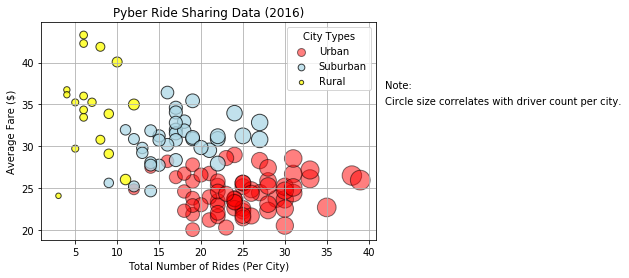

<Figure size 432x288 with 0 Axes>

In [138]:
#Create a scatter plot
plt.scatter(urban_total, urban_avg, s=urban_total*10,
            marker ='o', facecolors ="red", alpha = 0.5, edgecolors='black')
plt.scatter(sub_total, sub_avg, s=sub_total*10,
            marker ='o', facecolors ="lightblue", alpha = 0.75, edgecolors='black')
plt.scatter(rural_total, rural_avg, s=rural_total*10,
            marker ='o', facecolors ="yellow", alpha = 0.75, edgecolors='black')

#Add details
plt.grid()
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.legend(labels = ('Urban','Suburban','Rural'), markerscale= .5, title="City Types")
plt.text(42, 37, "Note:")
plt.text(42, 35, "Circle size correlates with driver count per city.")
plt.show()
plt.savefig("../Images/bubble.png")

We can see that the most expensive average fare belongs to rural cities, but rural cities have the least number of total rides. On the other hand, most rides occur in urban cities but the average cost is the lowest. We need to note that there are more urban cities than both suburband and rural cities. 

## Total Fares by City Type

We will compare the percentages of total ride fares by city type with the help of a pie chart.

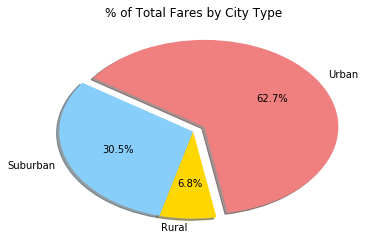

In [140]:
# Calculate Type Percents by using groupby
farepercent = (pyber_data.groupby("type"))["fare"].sum()/pyber_data["fare"].sum()
farepercent

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (.1, 0, 0)
upart = urban["fare"].sum()
rpart = rural["fare"].sum()
spart = suburban["fare"].sum()
rides = [upart, spart, rpart]
plt.pie(rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../Images/totalfares.png")

We can see that urban cities have the largest percentage of total fares. It is safe to assume that the demand for rides are high in the urban areas. However, we do not have enough data to see whether the demand or supply is low in suburban and rural areas.

## Total Rides by City Type

We will compare the total number of rides by city type with the help of a pie chart.

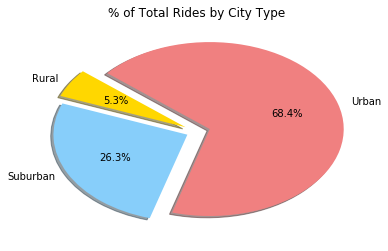

In [161]:
# Calculate Type Percents
ridepercent = (pyber_data.groupby("type"))["fare"].count()/pyber_data["fare"].count()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (.1,.08, .1)
plt.pie(ridepercent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.show()

# Save Figure
plt.savefig("../Images/totalrides.png")


We can see that urban cities have the highest percentage of total rides. Rural cities have the smallest percentage of total rides.

## Total Drivers by City Type

We will compare the total number of drivers by city type with the help of a pie chart.

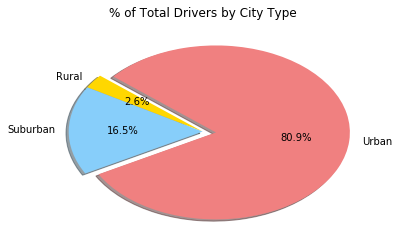

In [187]:
# Calculate Type Percents
dropduplicates = pyber_data.drop_duplicates("city")
driverpercent = (dropduplicates.groupby("type"))["driver_count"].sum()/dropduplicates["driver_count"].sum()
driverpercent

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,.1)
plt.pie(driverpercent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.show

# Save Figure
plt.savefig("../Images/totaldrivers.png")

Over 80% of total drivers live in urban areas, but 68.4% of total rides are in urban areas. Only 2.6% of total drivers live in rural but 5.3% of total rides are in rural areas. Only 16.5% live in suburban areas but 26.5% of total rides are in suburban areas. This data may suggest there is less supply than demand, and that we should find ways to increase the number of drivers in rural and suburban cities. However, it would be helpful to look at data for ride length, distance and whether drivers are crossing boarders to different city types.